In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Aesthetics
sns.set_theme(style='darkgrid', palette='muted')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (12, 5)
print('✅ Libraries loaded!')

✅ Libraries loaded!


In [2]:
df = pd.read_csv('karachi_aqi_30features.csv')

print(f'Shape: {df.shape[0]} rows × {df.shape[1]} columns')
df.head()

Shape: 1824 rows × 31 columns


,pm2_5,pm10,co,o3,so2,no2,nh3,no,temperature,humidity,...,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,wind_pollution,temp_humidity,aqi_change_24h,is_weekend,aqi
0,22.70,54.48,134.37,110.12,0.51,0.19,0.01,0.0,24.2,28,...,-1.840000e-16,0.0,1.0,-2.450000e-16,1.0,46.8,677.6,-1,0,3
1,21.83,51.61,132.67,112.63,0.62,0.20,0.00,0.0,23.2,30,...,2.588190e-01,0.0,1.0,-2.450000e-16,1.0,39.3,696.0,-1,0,3
2,21.50,50.49,131.42,115.24,0.77,0.21,0.00,0.0,22.6,33,...,5.000000e-01,0.0,1.0,-2.450000e-16,1.0,30.3,745.8,-1,0,3
3,21.59,50.82,130.41,117.44,0.95,0.23,0.00,0.0,22.1,34,...,7.071068e-01,0.0,1.0,-2.450000e-16,1.0,24.0,751.4,-1,0,3
4,21.82,51.99,129.58,119.89,1.16,0.27,0.00,0.0,21.8,34,...,8.660254e-01,0.0,1.0,-2.450000e-16,1.0,18.9,741.2,-1,0,3


In [3]:
print('=== Column Data Types ===')
print(df.dtypes)
print(f'\nTotal cells in dataset: {df.shape[0] * df.shape[1]:,}')

=== Column Data Types ===
pm2_5                   float64
pm10                    float64
co                      float64
o3                      float64
so2                     float64
no2                     float64
nh3                     float64
no                      float64
temperature             float64
humidity                  int64
wind_speed              float64
wind_direction            int64
cloud_cover               int64
aqi_lag_24h               int64
aqi_lag_48h               int64
aqi_lag_72h               int64
aqi_rolling_mean_72h    float64
aqi_rolling_min_72h       int64
aqi_rolling_max_72h       int64
aqi_rolling_std_72h     float64
hour_sin                float64
hour_cos                float64
day_of_week_sin         float64
day_of_week_cos         float64
month_sin               float64
month_cos               float64
wind_pollution          float64
temp_humidity           float64
aqi_change_24h            int64
is_weekend                int64
aqi           

🔍 Missing Values Analysis

Total Missing Cells : 0 out of 56,544 (0.00%)
Columns with missing values: 0

 Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []


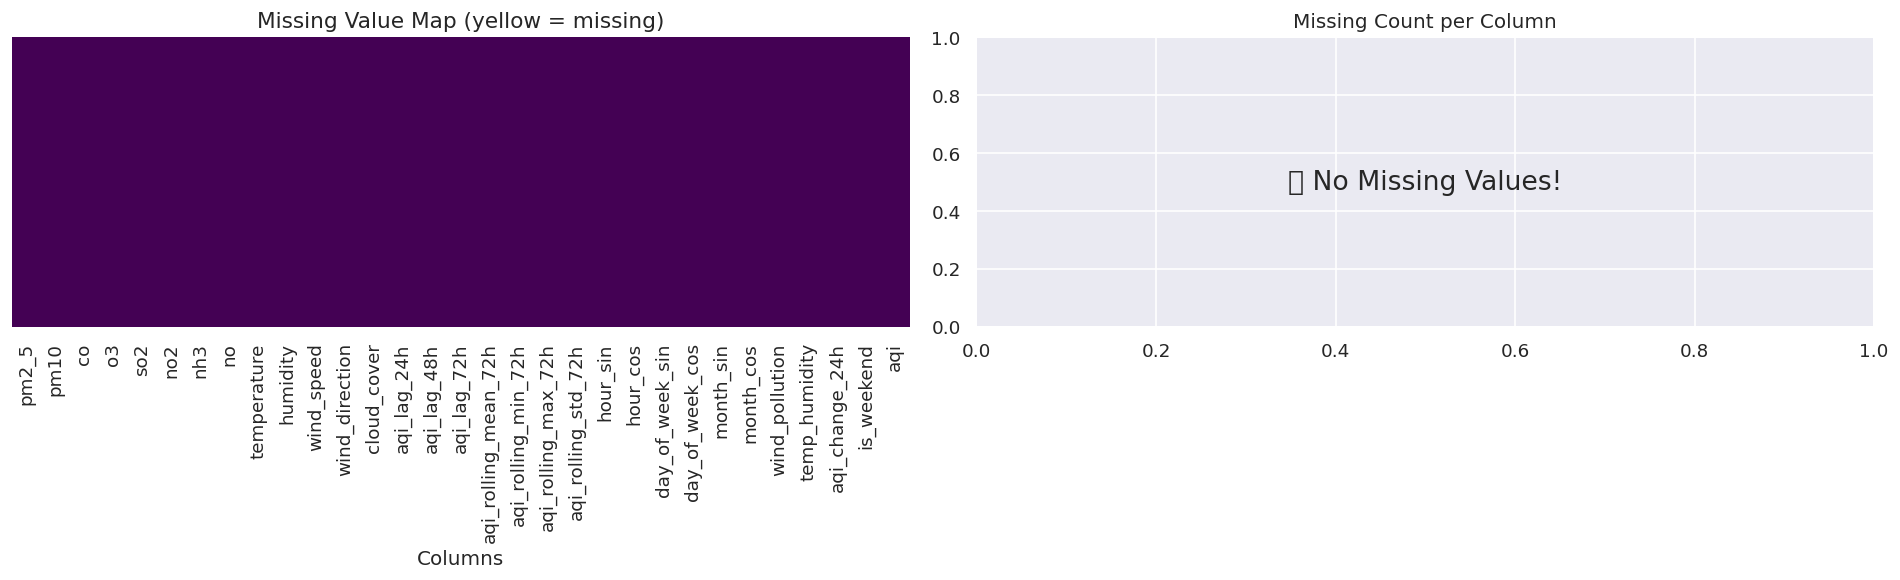

In [5]:
total_cells = df.shape[0] * df.shape[1]
missing = df.isnull().sum()
missing_pct = (missing / df.shape[0] * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

print(f'Total Missing Cells : {missing.sum():,} out of {total_cells:,} ({missing.sum()/total_cells*100:.2f}%)')
print(f'Columns with missing values: {(missing > 0).sum()}')
print('\n', missing_df[missing_df["Missing Count"] > 0])

# Visualise
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Heatmap of nulls
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing Value Map (yellow = missing)', fontsize=13)
axes[0].set_xlabel('Columns')

# Bar chart
cols_with_missing = missing_df[missing_df['Missing Count'] > 0]
if not cols_with_missing.empty:
    cols_with_missing['Missing Count'].plot(kind='bar', ax=axes[1], color='tomato', edgecolor='black')
    axes[1].set_title('Missing Count per Column')
    axes[1].set_ylabel('Count')
else:
    axes[1].text(0.5, 0.5, '🎉 No Missing Values!', ha='center', va='center', fontsize=16)
    axes[1].set_title('Missing Count per Column')

plt.tight_layout()
plt.show()

In [6]:
df.describe().T.style.background_gradient(cmap='Blues', subset=['mean', 'std', 'max'])

,count,mean,std,min,25%,50%,75%,max
pm2_5,1824.000000,55.789413,45.309848,0.000000,21.470000,44.905000,72.897500,262.000000
pm10,1824.000000,104.601129,72.729433,0.000000,49.140000,88.135000,142.032500,414.470000
co,1824.000000,269.937325,139.368620,87.190000,146.917500,250.945000,336.347500,824.500000
o3,1824.000000,122.826875,22.255202,83.510000,105.522500,122.145000,136.815000,209.650000
so2,1824.000000,5.346985,4.510916,0.070000,0.410000,5.525000,8.710000,19.730000
no2,1824.000000,0.981678,0.881668,0.020000,0.160000,0.840000,1.540000,4.760000
nh3,1824.000000,0.767094,1.610967,0.000000,0.000000,0.030000,0.782500,8.790000
no,1824.000000,0.030230,0.061345,0.000000,0.000000,0.000000,0.030000,0.460000
temperature,1824.000000,20.656579,4.059311,10.200000,17.500000,20.850000,23.700000,30.400000
humidity,1824.000000,58.061404,24.023223,5.000000,40.000000,61.000000,77.000000,100.000000


=== Variance, Std Dev & Coefficient of Variation ===


,Variance,Std Dev,Mean,CV (%)
pm2_5,2052.982400,45.309800,55.789400,81.220000
pm10,5289.570500,72.729400,104.601100,69.530000
co,19423.612100,139.368600,269.937300,51.630000
o3,495.294000,22.255200,122.826900,18.120000
so2,20.348400,4.510900,5.347000,84.360000
no2,0.777300,0.881700,0.981700,89.810000
nh3,2.595200,1.611000,0.767100,210.010000
no,0.003800,0.061300,0.030200,202.930000
aqi,0.949000,0.974200,3.609600,26.990000


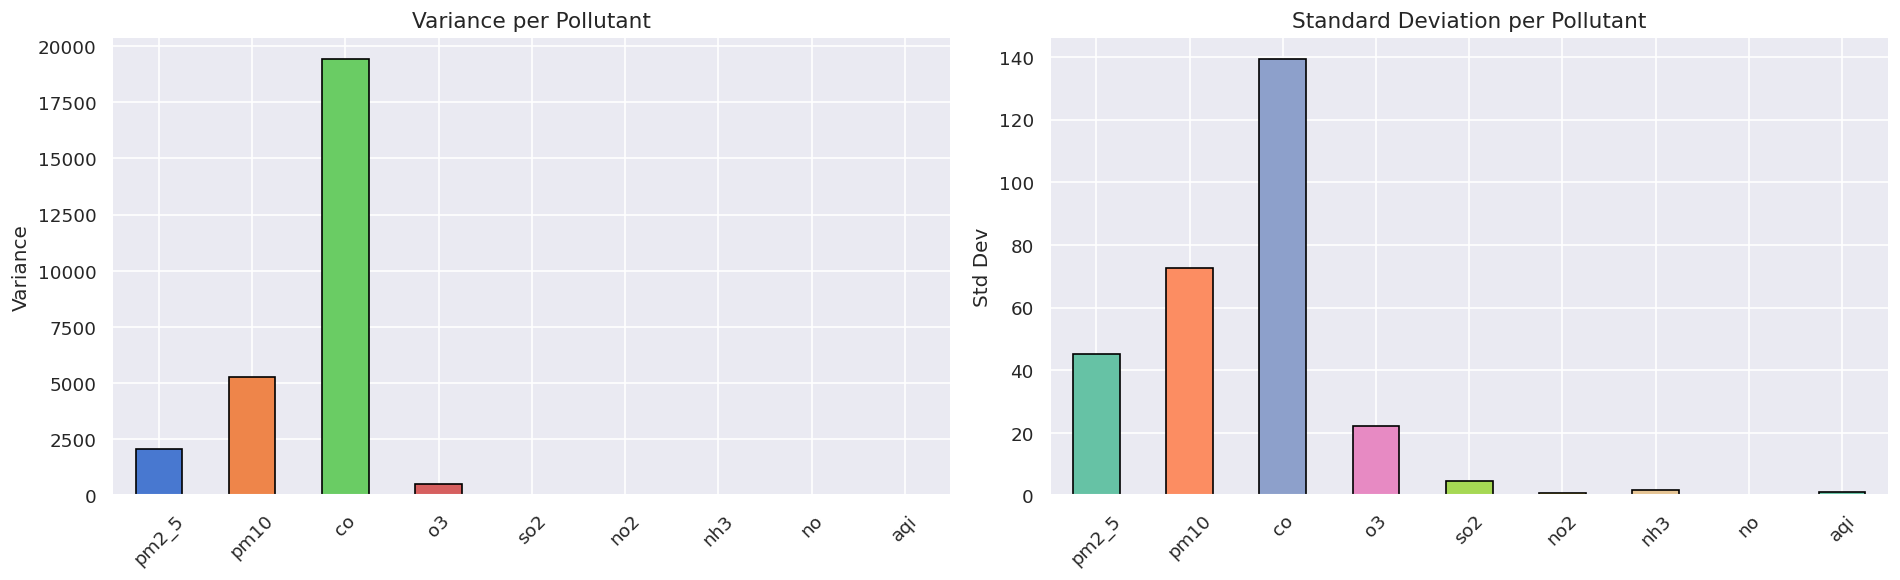

In [7]:
pollutants = ['pm2_5', 'pm10', 'co', 'o3', 'so2', 'no2', 'nh3', 'no', 'aqi']

var_df = pd.DataFrame({
    'Variance': df[pollutants].var().round(4),
    'Std Dev': df[pollutants].std().round(4),
    'Mean': df[pollutants].mean().round(4),
    'CV (%)': (df[pollutants].std() / df[pollutants].mean() * 100).round(2)  # Coefficient of variation
})

print('=== Variance, Std Dev & Coefficient of Variation ===')
display(var_df.style.background_gradient(cmap='YlOrRd', subset=['Variance', 'Std Dev']))

# Plot variance
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

var_df['Variance'].plot(kind='bar', ax=axes[0], color=sns.color_palette('muted', len(pollutants)), edgecolor='black')
axes[0].set_title('Variance per Pollutant', fontsize=13)
axes[0].set_ylabel('Variance')
axes[0].tick_params(axis='x', rotation=45)

var_df['Std Dev'].plot(kind='bar', ax=axes[1], color=sns.color_palette('Set2', len(pollutants)), edgecolor='black')
axes[1].set_title('Standard Deviation per Pollutant', fontsize=13)
axes[1].set_ylabel('Std Dev')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

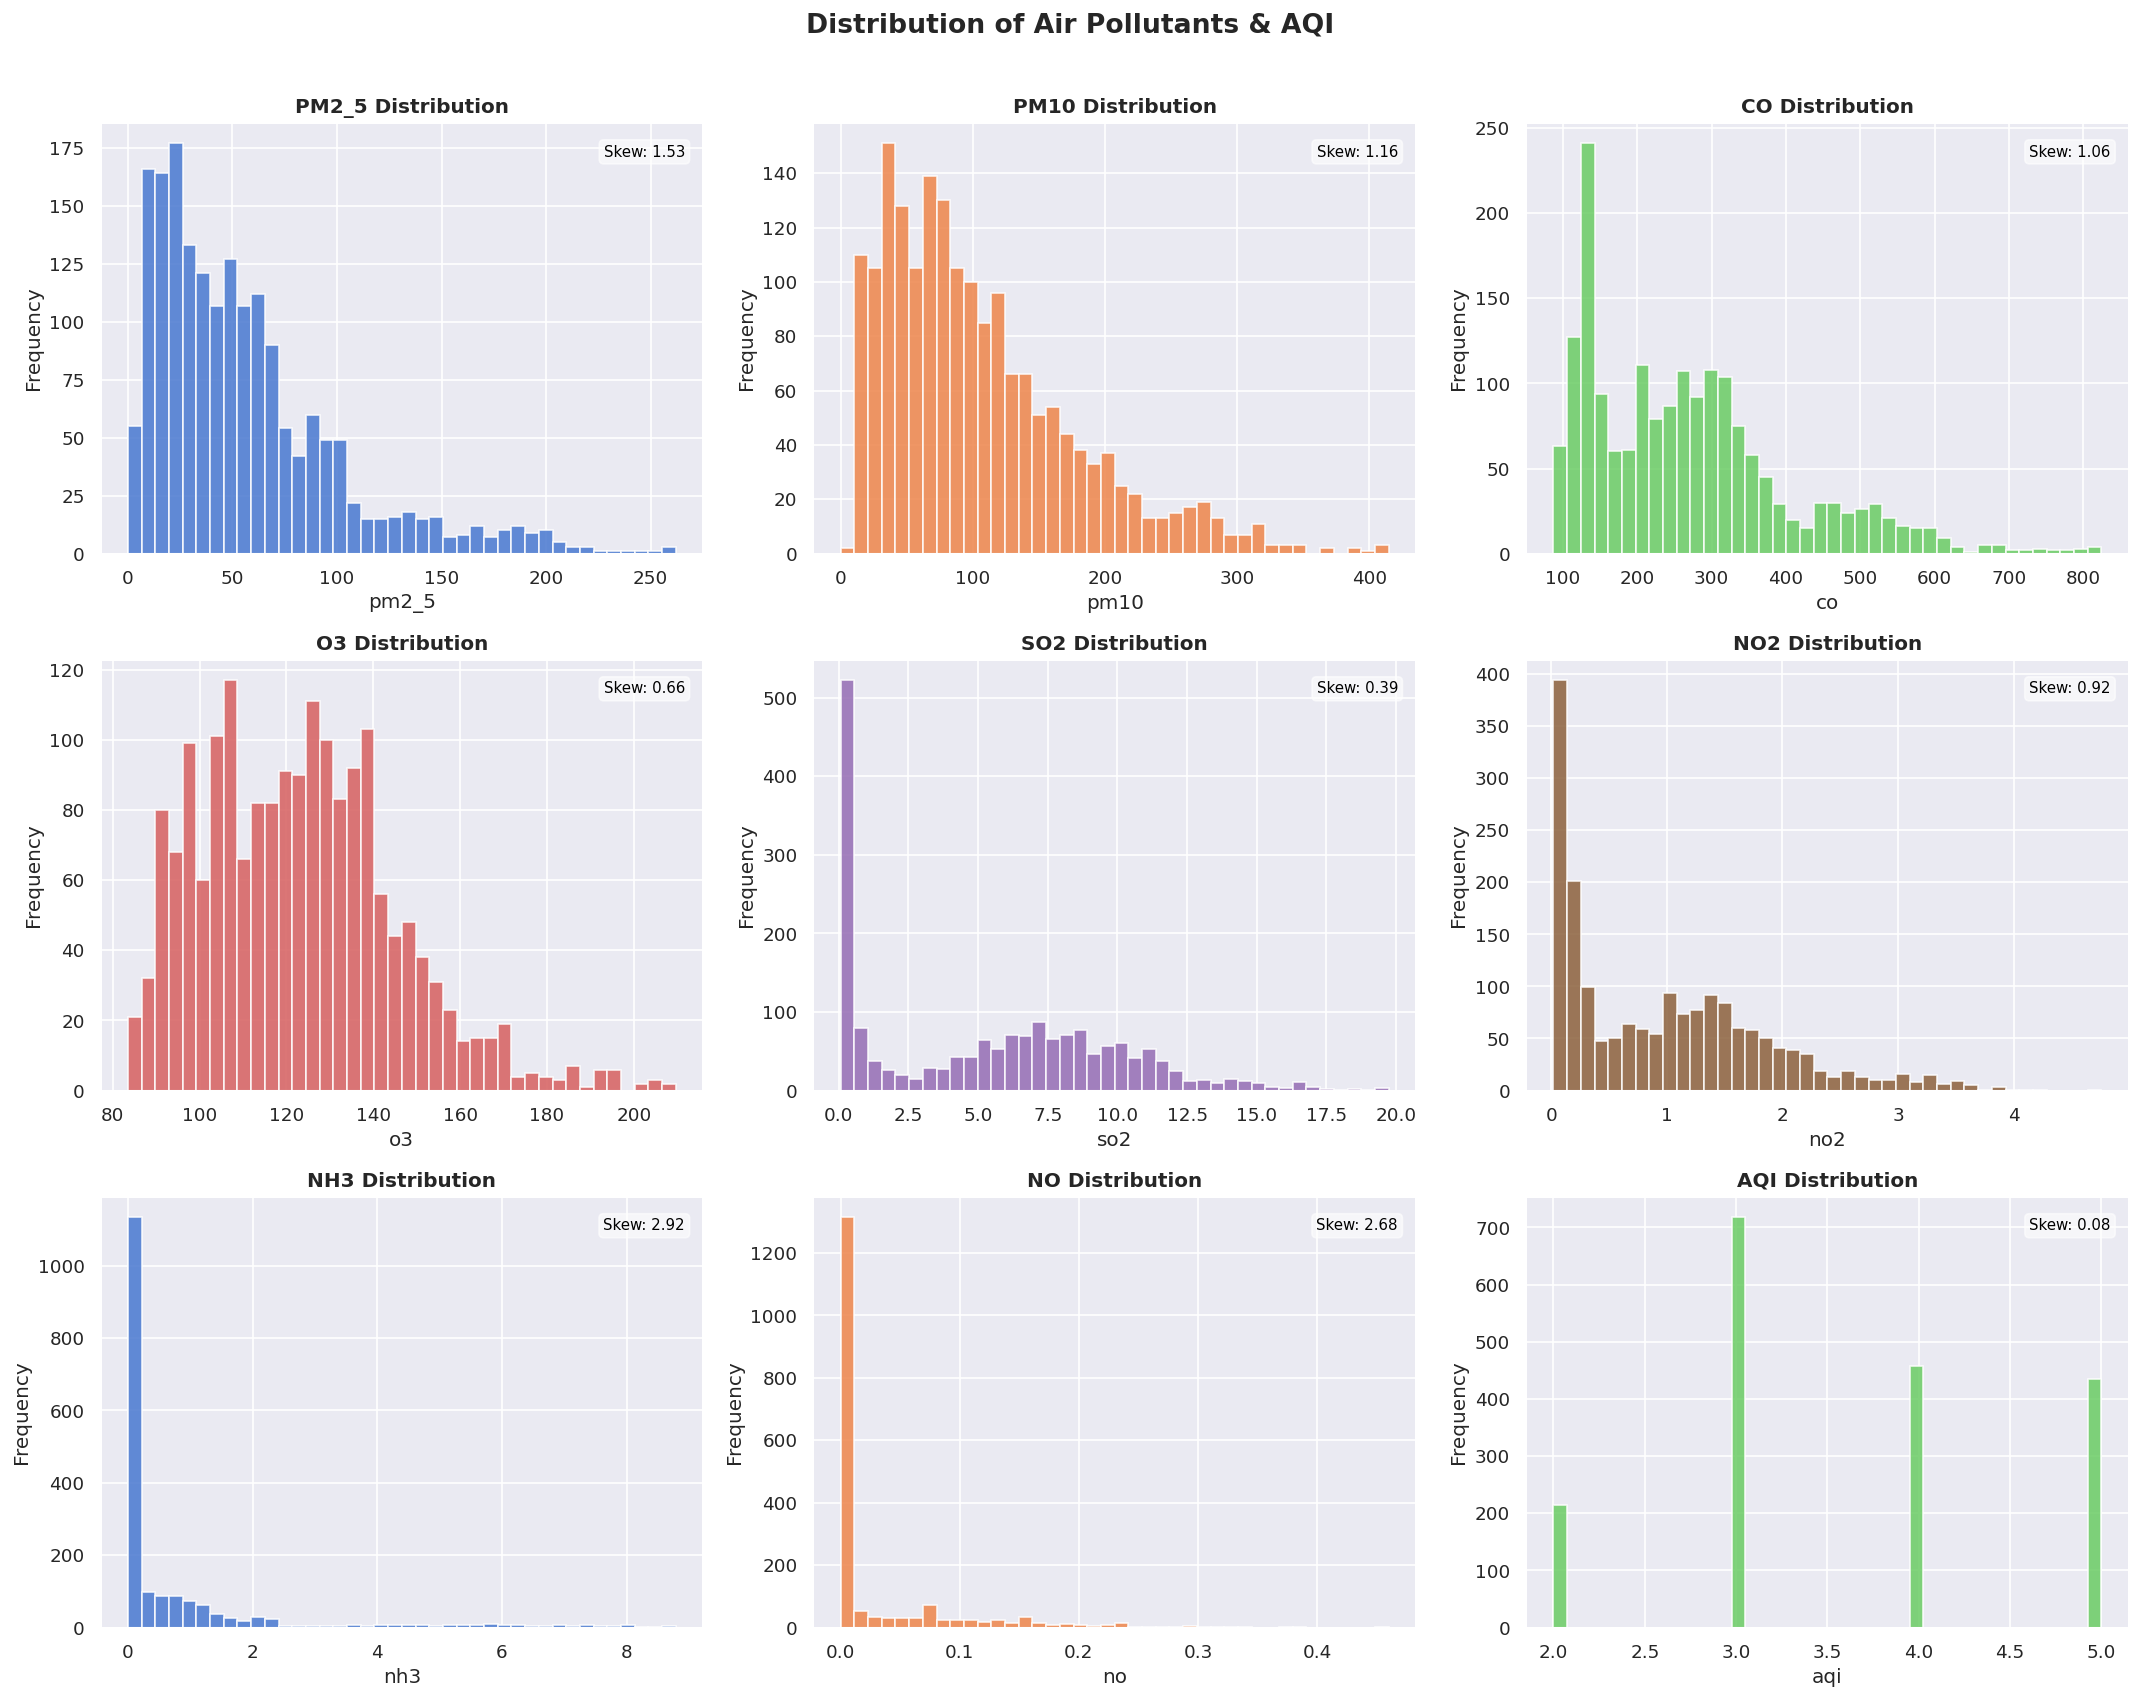

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(pollutants):
    axes[i].hist(df[col].dropna(), bins=40, color=sns.color_palette('muted')[i % 6], edgecolor='white', alpha=0.85)
    axes[i].set_title(f'{col.upper()} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    # Add skewness annotation
    skew_val = df[col].skew()
    axes[i].text(0.97, 0.95, f'Skew: {skew_val:.2f}', transform=axes[i].transAxes,
                 ha='right', va='top', fontsize=9, color='black',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.6))

plt.suptitle('Distribution of Air Pollutants & AQI', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

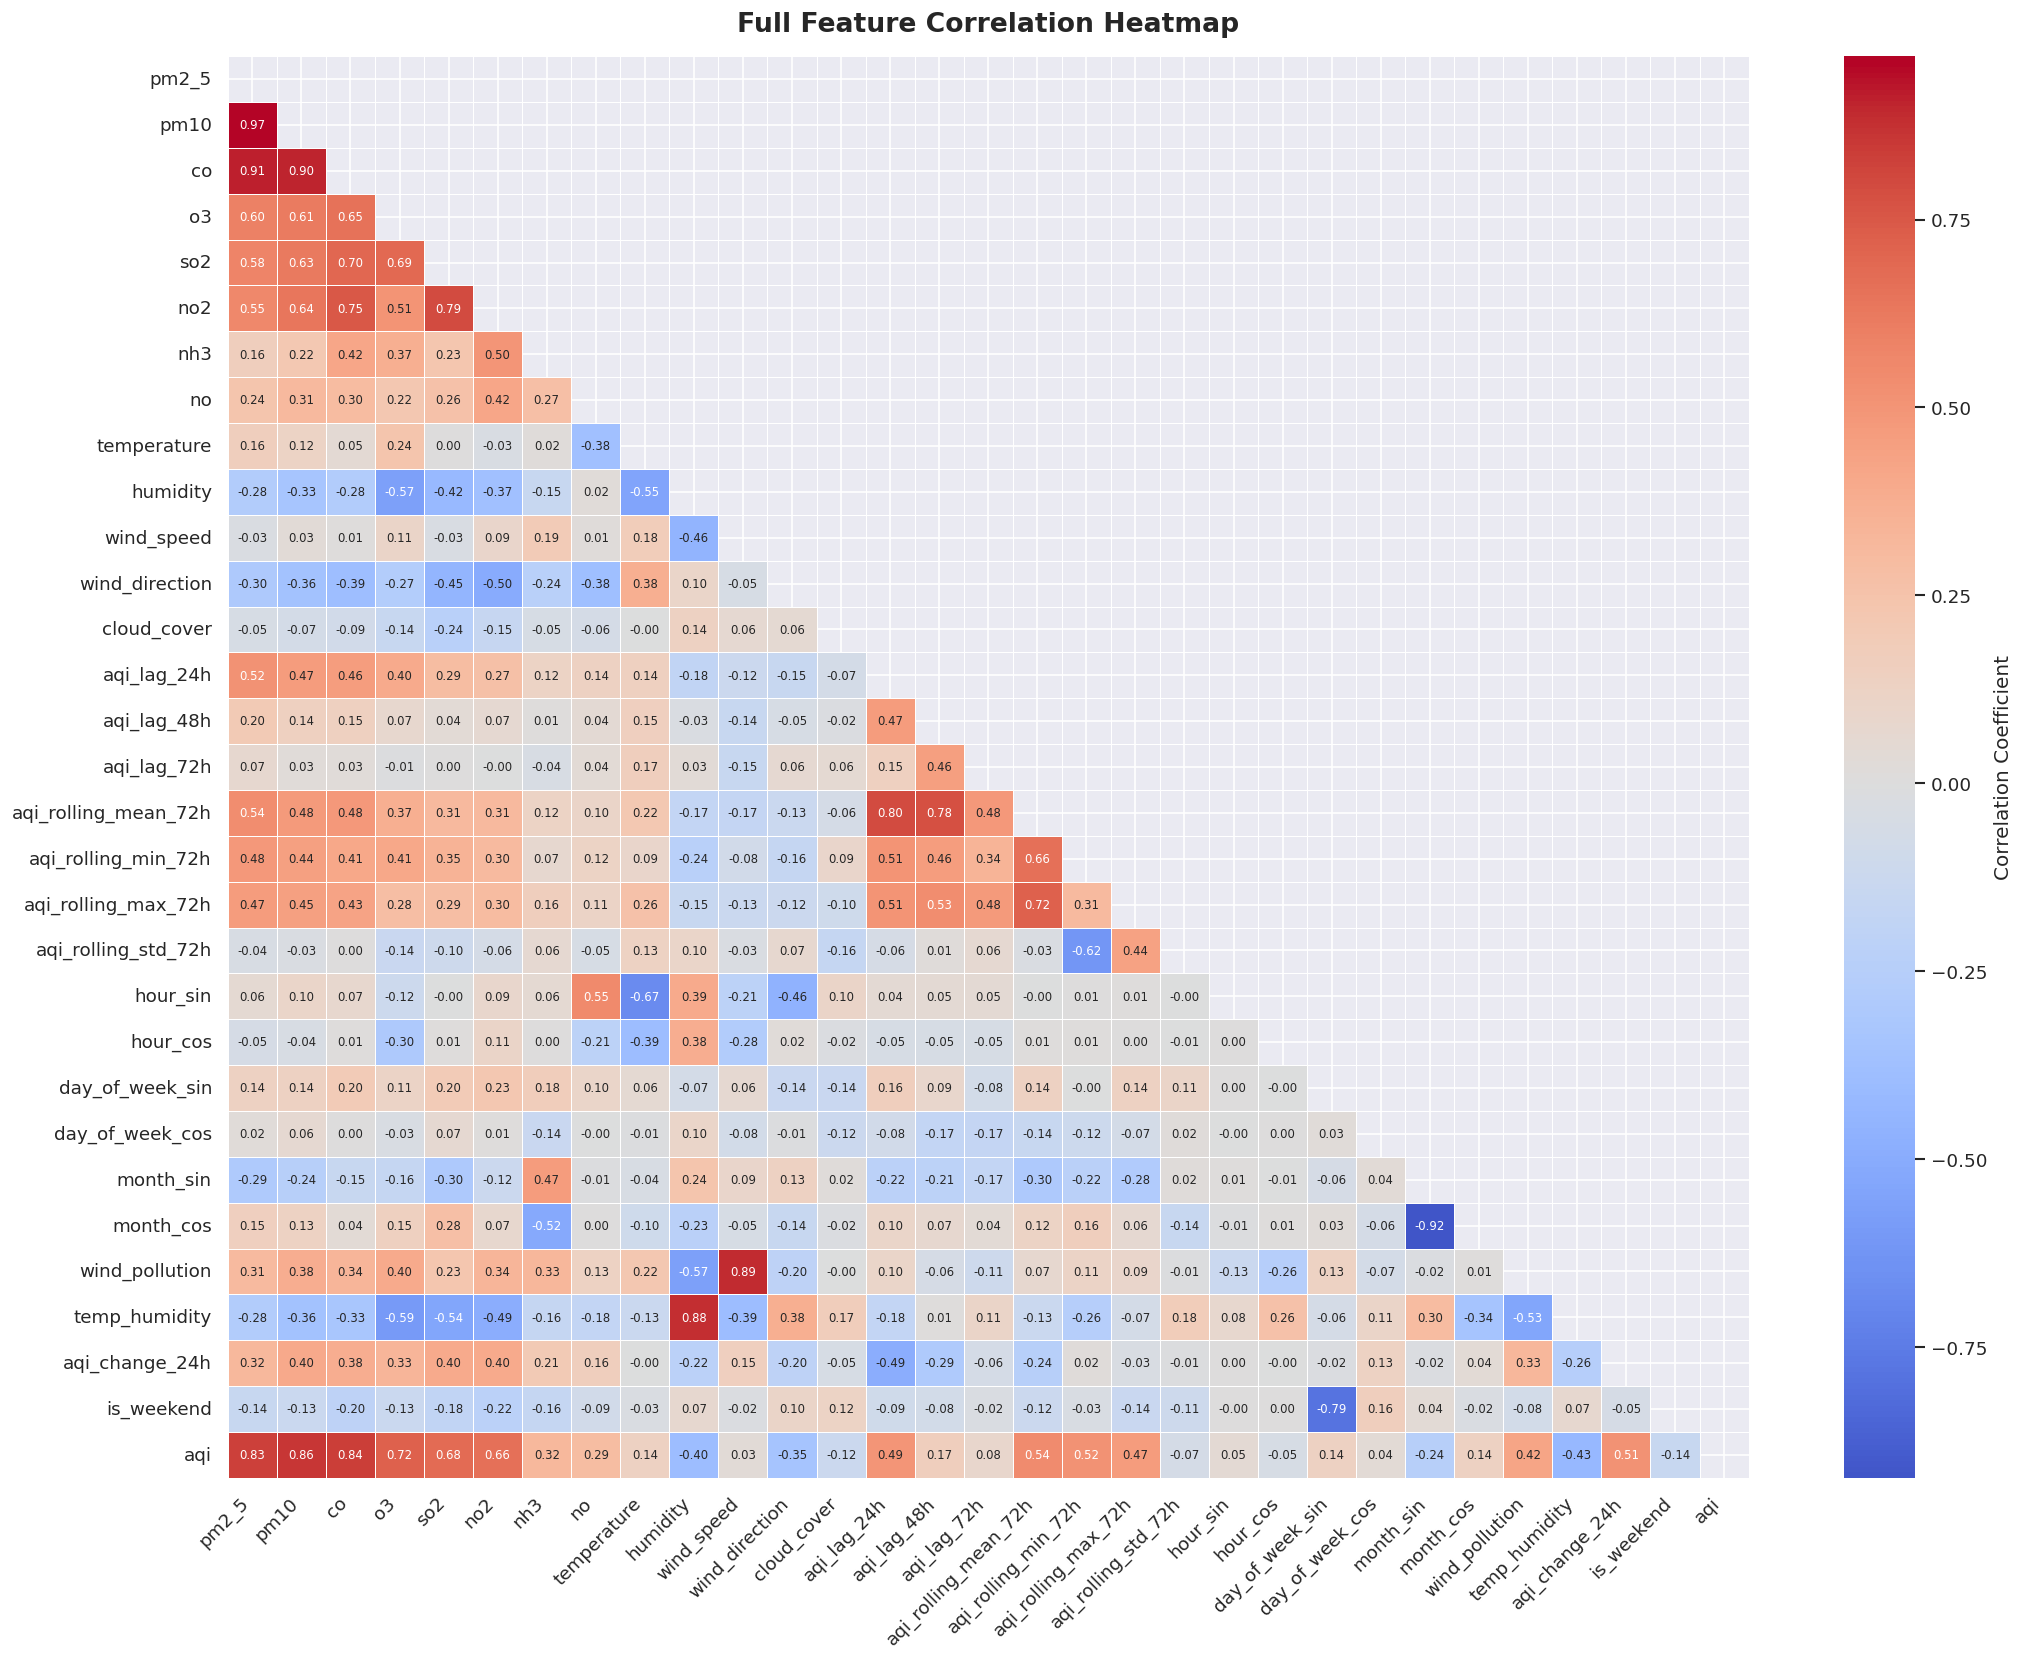

In [9]:
# Full correlation matrix (numeric cols only)
corr_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(18, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Show only lower triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, annot_kws={'size': 7},
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Full Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

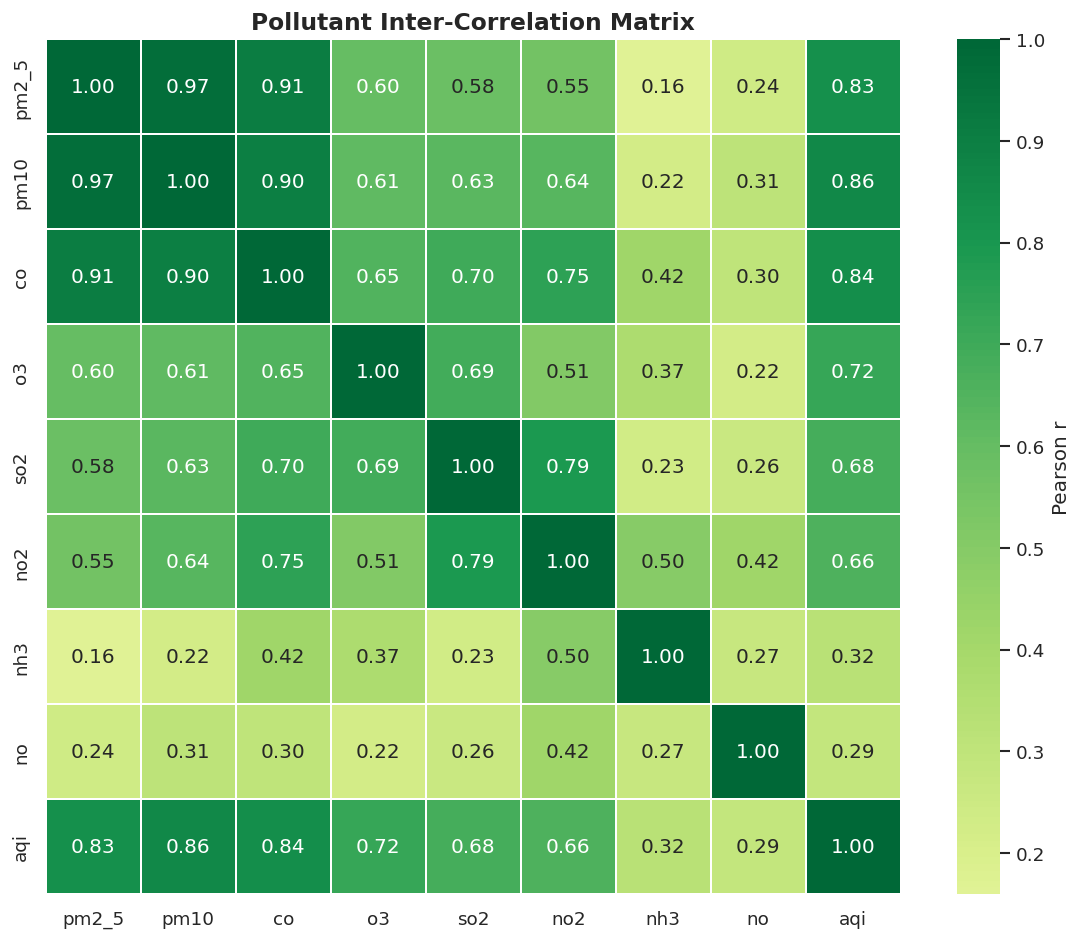


=== Top Correlations with AQI ===
pm10                    0.861188
co                      0.838882
pm2_5                   0.828926
o3                      0.721224
so2                     0.683064
no2                     0.658417
aqi_rolling_mean_72h    0.540504
aqi_rolling_min_72h     0.515203
aqi_change_24h          0.514717
aqi_lag_24h             0.494493
aqi_rolling_max_72h     0.470394
wind_pollution          0.422770
nh3                     0.323843
no                      0.290828
aqi_lag_48h             0.168152
day_of_week_sin         0.139278
temperature             0.137187
month_cos               0.135944
aqi_lag_72h             0.081591
hour_sin                0.047430
day_of_week_cos         0.043140
wind_speed              0.029319
hour_cos               -0.048244
aqi_rolling_std_72h    -0.066449
cloud_cover            -0.120213
is_weekend             -0.142614
month_sin              -0.240242
wind_direction         -0.345759
humidity               -0.395544
temp_hum

In [11]:
# Focused: Pollutants + AQI correlation
pollutant_corr = df[pollutants].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(pollutant_corr, annot=True, fmt='.2f', cmap='RdYlGn',
            center=0, linewidths=1, square=True,
            cbar_kws={'label': 'Pearson r'})
plt.title('Pollutant Inter-Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with AQI
print('\n=== Top Correlations with AQI ===')
print(corr_matrix['aqi'].drop('aqi').sort_values(ascending=False).to_string())

In [12]:
print('='*55)
print('          EDA SUMMARY — KARACHI AQI DATASET')
print('='*55)
print(f"  Rows            : {df.shape[0]}")
print(f"  Columns         : {df.shape[1]}")
print(f"  Total Cells     : {df.shape[0]*df.shape[1]:,}")
print(f"  Missing Cells   : {df.isnull().sum().sum()} ({df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100:.2f}%)")
print(f"  Duplicate Rows  : {df.duplicated().sum()}")
print()
print('--- Pollutant Stats ---')
for col in pollutants:
    print(f"  {col.upper():<8} | Mean: {df[col].mean():.2f} | Std: {df[col].std():.2f} | Var: {df[col].var():.2f}")
print()
print('--- Top AQI Correlations ---')
top_corr = corr_matrix['aqi'].drop('aqi').abs().sort_values(ascending=False).head(5)
for feat, val in top_corr.items():
    print(f"  {feat:<30} r = {corr_matrix['aqi'][feat]:.3f}")
print('='*55)

          EDA SUMMARY — KARACHI AQI DATASET
  Rows            : 1824
  Columns         : 31
  Total Cells     : 56,544
  Missing Cells   : 0 (0.00%)
  Duplicate Rows  : 0

--- Pollutant Stats ---
  PM2_5    | Mean: 55.79 | Std: 45.31 | Var: 2052.98
  PM10     | Mean: 104.60 | Std: 72.73 | Var: 5289.57
  CO       | Mean: 269.94 | Std: 139.37 | Var: 19423.61
  O3       | Mean: 122.83 | Std: 22.26 | Var: 495.29
  SO2      | Mean: 5.35 | Std: 4.51 | Var: 20.35
  NO2      | Mean: 0.98 | Std: 0.88 | Var: 0.78
  NH3      | Mean: 0.77 | Std: 1.61 | Var: 2.60
  NO       | Mean: 0.03 | Std: 0.06 | Var: 0.00
  AQI      | Mean: 3.61 | Std: 0.97 | Var: 0.95

--- Top AQI Correlations ---
  pm10                           r = 0.861
  co                             r = 0.839
  pm2_5                          r = 0.829
  o3                             r = 0.721
  so2                            r = 0.683
